# Classification using MNIST dataset

# Fetch the dataset

Scikit-learn provides many helper functions to download popular datasets. For example, MNIST is one such popular dataset. It is a dataset of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml #fetch_openml is used to fetch the data from openml.org
mnist = fetch_openml('mnist_784', version=1, parser='pandas') #parser='pandas' is used to convert the data into pandas dataframe
mnist.keys() #to see the keys of the dataset

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
#check the type of mnist object
type(mnist) #mnist is a bunch object which means it is a dictionary structure.

sklearn.utils._bunch.Bunch

## Fetch the datasets from the bunch object.

In [3]:
X, y = mnist["data"], mnist["target"] #X is the feature matrix and y is the target vector
descr = mnist["DESCR"] #DESCR is the description of the dataset
details = mnist["details"] #details is the details of the dataset
url = mnist["url"] #url is the url of the dataset

#print
print("X shape: ", X.shape) #gives dimension of the feature matrix
print("y shape: ", y.shape)
print("available at: ", url)
#print("DESCR: ", descr)
#print("details: ", details)

#print the type of X and y
print("\ntype of X: ", type(X))
print("type of y: ", type(y))

X shape:  (70000, 784)
y shape:  (70000,)
available at:  https://www.openml.org/d/554

type of X:  <class 'pandas.core.frame.DataFrame'>
type of y:  <class 'pandas.core.series.Series'>


In [4]:
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# See how the images look like

There are 70,000 images (28x28 pixels), and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). This is why this dataset is also called “the MNIST of pixels”. The target array contains the digit each image represents: a label from 0 to 9.

Let's get an idea how the images look like with the pixel intensity values.

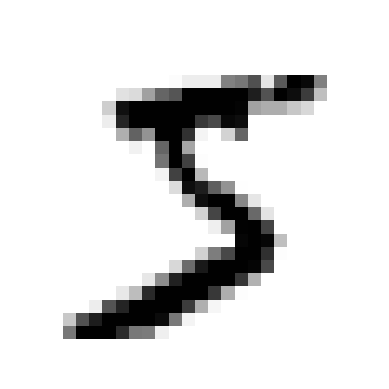

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#plot the first image
some_digit = X.iloc[0] #get the first row of the feature matrix
some_digit_image = some_digit.values.reshape(28, 28) #reshape the data into 28x28 matrix
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest") #plot the image using imshow
plt.axis("off") #turn off the axis
plt.show()

In [6]:
#get the target value of the first image
print("Target value: ", y[0])
print(type(y[0]))

Target value:  5
<class 'str'>


We see that label is not a number but a string. Let's convert it to a number since most ML algorithms expect numbers.

In [7]:
#astype is used to convert the data type of the array to the specified data type
y = y.astype(np.uint8) #uint8 is the unsigned integer of 8 bits

# Create train and test sets

Since the dataset is already shuffled, we can directly split it into a training set (first 60,000 images) and a test set (last 10,000 images).

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] #split the data into train and test

# Training a binary classifier

Let's simply the problem for now and try to identify one digit - for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

In [9]:
#create the target train and test sets for only 5s
y_train_5 = (y_train == 5) #True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

## SGD Classifier

### Train
Let's train a Stochastic Gradient Descent(SDG) Classifier on the dataset. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time.

In [10]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5) #fit the model

SGDClassifier(random_state=42)

### Metrics

Predict the target value of the first image we had plotted

In [11]:
sgd_clf.predict([some_digit]) 

c:\Users\kruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

The classifier made the right pridiction. Let's check the accuracy of the classifier on whole test set.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#predict the target values of the test set
y_pred = sgd_clf.predict(X_test)

#check the accuracy of the model.
print("Accuracy: ", accuracy_score(y_test_5, y_pred), "\n")

Accuracy:  0.9492 



# Evaluation of the model

### Cross Validation

Check the k-fold cross validation score for the classifier.

In [13]:
from sklearn.model_selection import cross_val_score

#10 fold cross validation
fold_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=10, scoring="accuracy", n_jobs=-1)
for i in range(0,10):
    print("fold ", i ,": ", fold_scores[i])
#check the mean and std of the scores
print("mean: ", fold_scores.mean())
print("std: ", fold_scores.std())

fold  0 :  0.9641666666666666
fold  1 :  0.9586666666666667
fold  2 :  0.9641666666666666
fold  3 :  0.9583333333333334
fold  4 :  0.9673333333333334
fold  5 :  0.9693333333333334
fold  6 :  0.9643333333333334
fold  7 :  0.9658333333333333
fold  8 :  0.9575
fold  9 :  0.9656666666666667
mean:  0.9635333333333334
std:  0.0038273866918419556


The mean score of 96% accuracy is great!! It shows that the classifier is not overfitting the training set.

### Confusion Matrix

Confusion Matrix gives the number of correct and incorrect predictions made by the classifier.

- |  True Negative  | False Positive |
- |  False Negative | True Positive  |


In [14]:
#get the actual predictions of the cross validation taking k as 3
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)

#check the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))

[[53892   687]
 [ 1891  3530]]


In [15]:
#Ideal Confusion Matrix
print(confusion_matrix(y_train_5, y_train_5))

[[54579     0]
 [    0  5421]]


### Other Metrics

Other Merics include:
1. Precision:
    P = TP/(TP+FP)
2. Recall:
    R = TP/(TP+FN)
3. F1 Score:
    F1 = 2PR/(P+R)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))
print("F1 Score: ", f1_score(y_train_5, y_train_pred))

#or, we get the same result using classification_report
print("\n",classification_report(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:  0.6511713705958311
F1 Score:  0.7325171197343846

               precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



## Precision Recall Tradeoff

Write about it

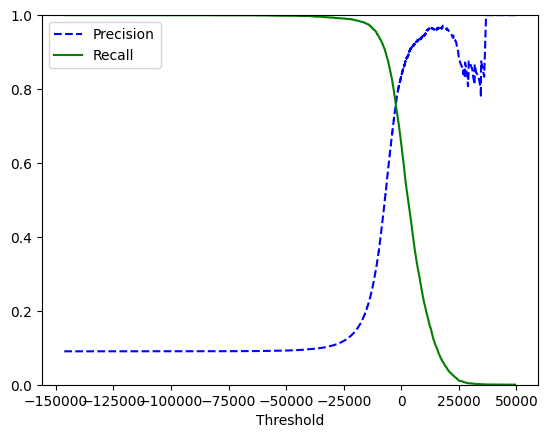

In [17]:
#check the precision and recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function", n_jobs=-1)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#plot the precision and recall curves
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()